In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore'
]
train = train.drop(columns=feats_to_drop)

In [5]:
train = TabularDataset(train)

# Training

In [6]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=train,
    time_limit=3600 * 10,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    save_space=False,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
    feature_prune_kwargs={"force_prune": True}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240523_103657"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240523_103657/ds_sub_fit/sub_fit_ho.
2024-05-23 10:36:58,188	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.0011591	valid_set's r2: -81.3702
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00123036	valid_set's r2: -81.4469
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4. Best iteration is:
	[4]	valid_set's l2: 0.00189904	valid_set's r2: -83.113
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best itera

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[5]	valid_set's l2: 0.0017003	valid_set's r2: -81.4418
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00143882	valid_set's r2: -81.4418
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Best iteration is:
	[3]	valid_set's l2: 0.00200796	valid_set's r2: -86.414
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00257773	valid_set's r2: -94.1823
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteratio

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 16.
	Ran out of time, early stopping on iteration 18.
	Ran out of time, early stopping on iteration 20.
	Ran out of time, early stopping on iteration 21.
	Ran out of time, early stopping on iteration 22.
	Ran out of time, early stopping on iteration 23.
	Ran out of time, early stopping on iteration 26.
	Ran out of time, early stopping on iteration 31.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.7545	 = Validation score   (r2)
	75.55s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 84.29s of the 8690.91s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 84.29s of the 8592.52s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.00165044	valid_set's r2: -81.4539
	Ran out of time, early 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0023799	valid_set's r2: -92.1765
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00229535	valid_set's r2: -89.9676
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238032	valid_set's r2: -91.519
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00256805	valid_set's r2: -94.5587
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning LightGBMXT_BAG_L2... Skipping this model.
Hyperparameter tuni

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237534	valid_set's r2: -91.1892
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00229046	valid_set's r2: -89.7363
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237566	valid_set's r2: -91.1892
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0025675	valid_set's r2: -94.5587
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning LightGBM_BAG_L2... Skipping this model.
Hyperparameter tunin

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 16.
	Ran out of time, early stopping on iteration 20.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.239	 = Validation score   (r2)
	62.44s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 71.09s of the 4568.16s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogl

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 71.09s of the 4481.04s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0024618	valid_set's r2: -94.4817
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 71.09s of the 4466.62s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with Sequenti

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 68. Best iteration is:
	[62]	valid_set's l2: 0.00036702	valid_set's r2: -80.6802
	Ran out of time, early stopping on iteration 53. Best iteration is:
	[53]	valid_set's l2: 0.00037683	valid_set's r2: -81.0702
	Ran out of time, early stopping on iteration 73. Best iteration is:
	[73]	valid_set's l2: 0.00035902	valid_set's r2: -80.9816
	Ran out of time, early stopping on iteration 75. Best iteration is:
	[74]	valid_set's l2: 0.000361929	valid_set's r2: -81.2442
	Ran out of time, early stopping on iteration 80. Best iteration is:
	[80]	valid_set's l2: 0.000361496	valid_set's r2: -81.4353
	Ran out of time, early stopping on iteration 84. Best iteration is:
	[83]	valid_set's l2: 0.000358181	valid_set's r2: -81.6395
	Ran out of time, early stopping on iteration 91. Best iteration is:
	[88]	valid_set's l2: 0.000358284	valid_set's r2: -81.8368
	Ran out of time, e

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	161.9s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 267.51s of the 28106.76s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 512, in validate_search_space
    raise EmptySearchSpace
autogluon.core.hpo.exceptions.EmptySearchSpace

During handling of the above exception, ano

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 73.
	Ran out of time, early stopping on iteration 73.
	Ran out of time, early stopping on iteration 78.
	Ran out of time, early stopping on iteration 81.
	Ran out of time, early stopping on iteration 85.
	Ran out of time, early stopping on iteration 91.
	Ran out of time, early stopping on iteration 97.
	Ran out of time, early stopping on iteration 119.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8653	 = Validation score   (r2)
	251.26s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 267.51s of the 27807.0s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8673	 = Validation score   (r2)
	274

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.807	 = Validation score   (r2)
	253.21s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 267.51s of the 27273.03s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 43. Best iteration is:
	[21]	valid_set's l2: 0.000976954	valid_set's r2: -80.6808
	Ran out of time, early stopping on iteration 45. Best iteration is:
	[20]	valid_set's l2: 0.00101159	valid_set's r2: -81.0208
	Ran out of time, early stopping on iteration 46. Best iteration is:
	[21]	valid_set's l2: 0.000971665	valid_set's r2: -80.9743
	0.6213	 = Validation score   (r2)
	232.4s	 = Training   runtime
	1.88s	 = Validation runtime
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model fo

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00145857	valid_set's r2: -81.6089
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[12]	valid_set's l2: 0.000752701	valid_set's r2: -81.3503
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.0014609	valid_set's r2: -81.5963
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Best iteration is:
	[1]	valid_set's l2: 0.00257372	valid_set's r2: -94.5072
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iter

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[13]	valid_set's l2: 0.000937429	valid_set's r2: -81.3353
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.00104891	valid_set's r2: -81.4367
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00169586	valid_set's r2: -82.408
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best iteration is:
	[1]	valid_set's l2: 0.0025733	valid_set's r2: -94.5072
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best itera

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 15.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 22.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 10.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 14.
	Ran out of time, early stopping on iteration 14.
	Ran out of time, early stopping on iteration 16.
	Ran out of time, early stopping on iteration 18.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T4 ...
	0.2299	 = Validation sc

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 211.17s of the 13449.49s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.00149698	valid_set's r2: -81.5952
	Time limit exceeded

In [7]:
X_train = train.drop('FloodProbability', axis=1)
y_train = train['FloodProbability']

y_preds = predictor.predict(X_train)

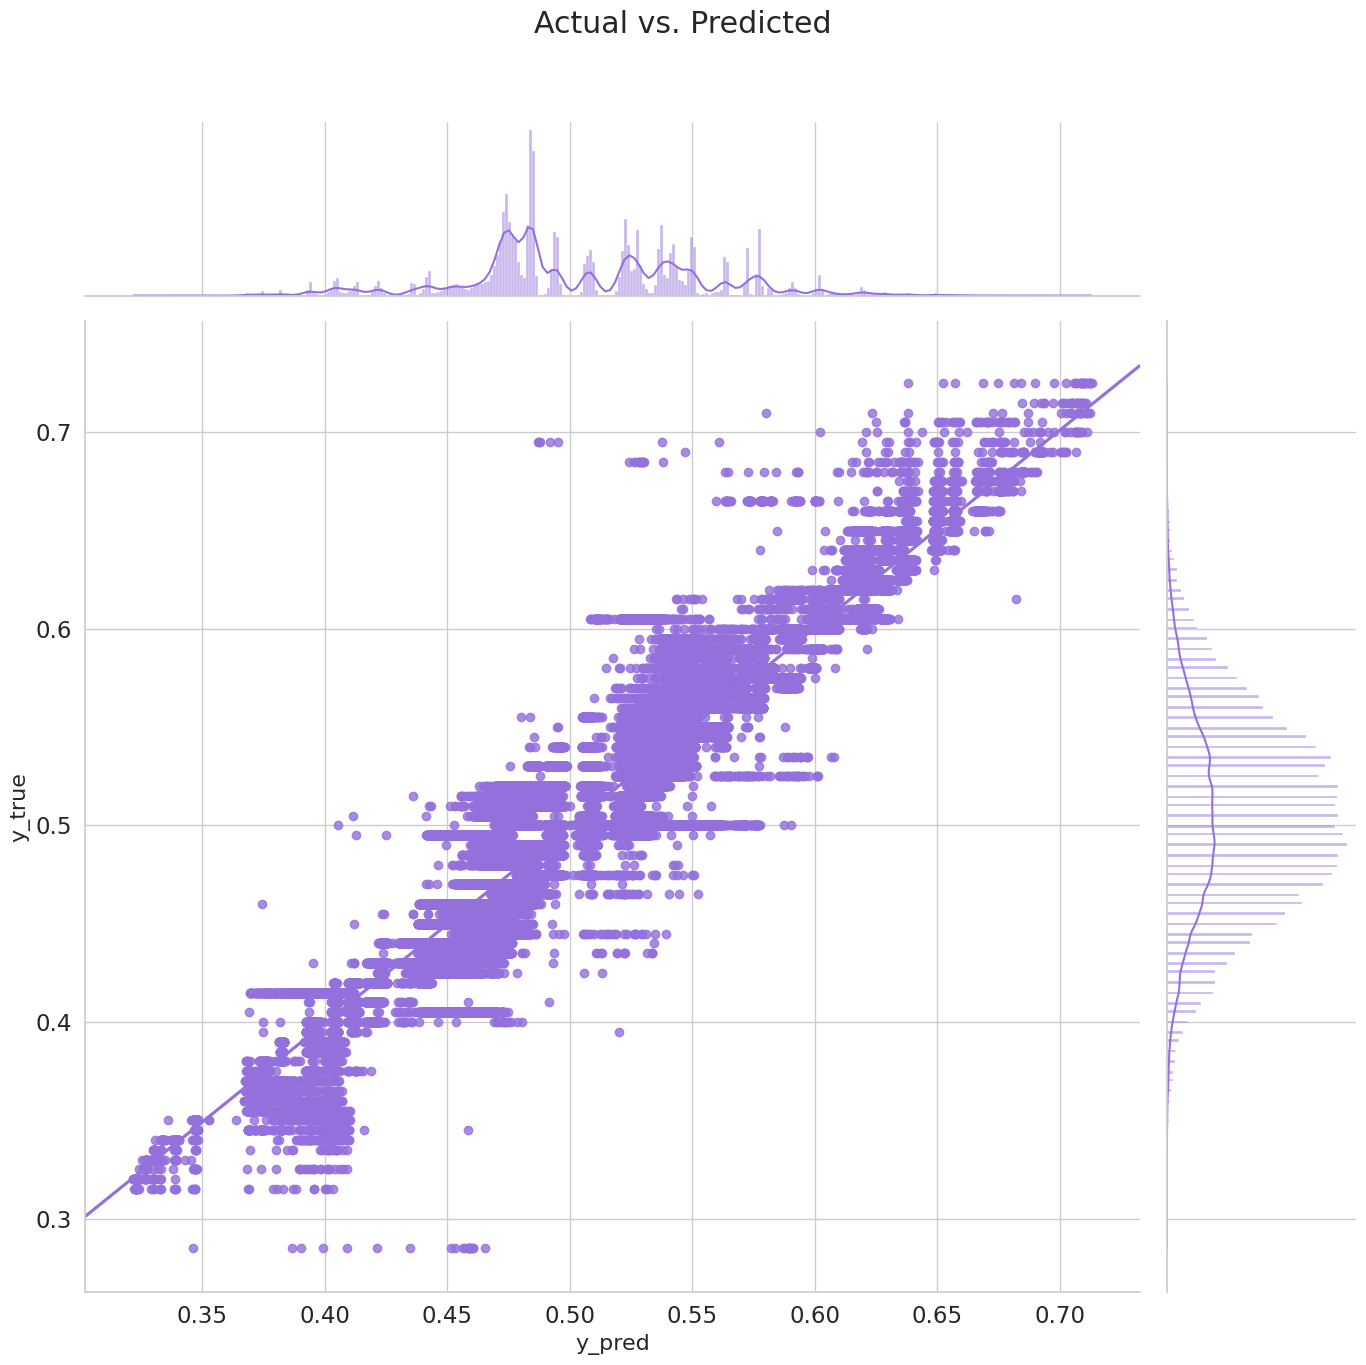

In [8]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Making Predictions and Creating a Submission File

In [9]:
oof_predictions = predictor.get_oof_pred_proba()
oof_predictions.to_csv('autogluon_oof_preds.csv')

In [10]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [11]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv('autogluon.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.578048
1117958,1117958,0.455275
1117959,1117959,0.448279
1117960,1117960,0.466378
1117961,1117961,0.466105


In [12]:
shutil.rmtree("AutogluonModels")